**Gyakorlati rész - max. 60 perc**

Beadandó: a githubra feltöltött notebook linkje

- <span style="color: var(--vscode-foreground);">Az SQL feladatrészben (1-5 feladatok) tetszőlegesen választott 4 db feladatot kell megoldani, mindegyik 5 pontot ér</span>
- <span style="color: var(--vscode-foreground);">Az SQL feladatok az egyetemi szerver Szálláshely adatbázisához tartoznak, de ennek online változata is használható.</span>
- Plusz feladat megoldására 2.5 pont adható

Feladat1 - Több táblás lekérdezés + GROUP BY

Készítsen lekérdezést, amely szállásonként megadja a következő információkat:

- hány db foglalás történt
- összesen hány felnőttre foglaltak
- összesen hány gyermekre foglaltak

Csak  a szállások neve, és a három kalkuláció eredménye jelenjen meg. Hagyjuk ki azokat a szállásokat, ahol a foglalások száma 5 vagy kevesebb.

In [1]:
select  szh.SZALLAS_NEV,
        count(*) as 'Összes foglalás',
        SUM(f.felnott_szam) as 'Felnőtt szám',
        SUM(f.gyermek_szam) as 'Gyerek szám'
from Foglalas f join Szoba sz on f.szoba_fk = sz.szoba_id
                join Szallashely szh on sz.szallas_fk = szh.szallas_id
group by szh.szallas_nev
having count(*) > 5

(11 rows affected)

Total execution time: 00:00:00.054

SZALLAS_NEV,Összes foglalás,Felnőtt szám,Gyerek szám
Szieszta Apartmanház,34,67,16
Fortuna Panzió,126,217,94
Kentaur Hotel,179,292,128
Partiszél Vendégház,26,42,21
Sába-Ház,70,125,41
Családi Ház,18,36,16
Fortuna Apartman,39,67,39
Hotel Három Hattyú,204,329,175
Jáde panzió,29,52,14
Lagúna Hotel,123,204,87


Feladat2 - Egy vagy többtáblás lekérdezés beágyazással

Melyek azok a szállások, ahol volt 3-nál több felnőttre való foglalás?

- csak a szállások neve jelenjen meg

In [4]:
select DISTINCT szh.szallas_nev
from Foglalas f join szoba sz on f.SZOBA_FK = sz.SZOBA_ID
                join Szallashely szh on sz.szallas_fk = szh.szallas_id
WHERE f.FELNOTT_SZAM > 3 


(1 row affected)

Total execution time: 00:00:00.012

szallas_nev
Fortuna Apartman


Feladat3 - Analitikus fv, ablakok és partíciók

Készítesen lekérdezést, amely szálláshelyenként kumulatívan (göngyölítve) megjeleníti a foglalások összes darabszámát az időben a foglalás dátuma szerinti sorrendben!

In [12]:
select  szh.szallas_nev,
        f.METTOL,
        count(*) over (partition by szh.szallas_nev order by f.METTOL range between unbounded preceding and current ROW)
FROM Foglalas f JOIN Szoba sz ON f.szoba_fk = sz.szoba_id
                JOIN Szallashely szh ON sz.SZALLAS_FK = szh.SZALLAS_ID

(1027 rows affected)

Total execution time: 00:00:00.047

szallas_nev,METTOL,(No column name)
Családi Ház,2016-05-22,1
Családi Ház,2016-05-24,2
Családi Ház,2016-06-03,3
Családi Ház,2016-06-20,4
Családi Ház,2016-07-13,5
Családi Ház,2016-07-18,6
Családi Ház,2016-08-08,7
Családi Ház,2016-08-16,8
Családi Ház,2016-08-24,9
Családi Ház,2016-09-12,10


Feladat4 - Group by spec. lehetőségek

Készítesen lekérdezést, amely megadja, hogy melyik évben hány vendég született!

- A lekérdezés jelenítese meg megfelelően jelölve a végösszeget is!
- Hagyjuk ki azokat a vendégeket, akik páros évben születtek!

In [6]:
SELECT IIF(YEAR(szul_dat) IS NULL, 'Végösszeg', CAST(YEAR(szul_dat) AS NVARCHAR(10))),
       COUNT(*) AS 'Fő'
FROM Vendeg
WHERE YEAR(szul_dat) % 2 != 0
GROUP BY ROLLUP(YEAR(szul_dat))

(17 rows affected)

Total execution time: 00:00:00.017

(No column name),Fő
1967,8
1969,8
1971,5
1973,4
1975,10
1977,5
1979,7
1981,4
1983,8
1985,6


Feladat5 - Adatprofilozás vagy anonimizálás

Készítesen egy anonimizált Foglalás táblát, ahol az Ugyfel\_FK és a SZOBA\_FK anoním!

In [8]:
CREATE TABLE #AnonimFoglalas
(
    foglalas_pk int PRIMARY KEY,
    ugyfel_fk nvarchar(20) MASKED WITH (FUNCTION = 'partial(1, "XX", 1)'),
    szoba_fk int MASKED WITH (FUNCTION = 'random(1, 666)'),
    mettol date,
    meddig date,
    felnott_szam int,
    gyermek_szam int
)

(1027 rows affected)

Total execution time: 00:00:00.173

FOGLALAS_PK,UGYFEL_FK,SZOBA_FK,METTOL,MEDDIG,FELNOTT_SZAM,GYERMEK_SZAM
558,NANDORF,87,2016-04-06,2016-04-10,2,1
559,ARONK,131,2016-04-06,2016-04-08,2,0
560,SEBASTIANF,6,2016-04-06,2016-04-12,2,0
561,laszlo2,42,2016-04-06,2016-04-10,2,0
562,PETERB,7,2016-04-06,2016-04-10,1,0
563,sebestyen,68,2016-04-07,2016-04-12,1,3
564,nikoletta4,5,2016-04-08,2016-04-10,1,1
565,kristof4,141,2016-04-08,2016-04-14,2,0
566,KRISZTIANM,21,2016-04-09,2016-04-15,1,1
567,anett3,170,2016-04-10,2016-04-17,1,0


- A NoSQL-es feladatrészben pontosan 2 feladatot kell megoldani, ebből legalább egy REDIS vagy CASSANDRA legyen
- Minden feladat 5-5 pontot ér, plusz feladat megoldására 2.5 pont adható
- A feladatokhoz tartozó platformok:
    - REDIS - RedisInsight (RedisLabs)
    - CASSANDRA - CQL Console (Datastax Astra)
    - <span style="color: var(--vscode-foreground);">MongoDB: Mongo Shell (sample_mflix adatbázis)</span>
    - <span style="color: var(--vscode-foreground);">Neo4j: Desktop vagy Sandbox (movies adatbázis)</span>

Feladat6 - REDIS alapvető adattípusok vagy relációs tábla implementálása

Hozzon létre kulcsokat úgy, hogy azok az alábbi relációs szerkezetet valósítsák meg! 

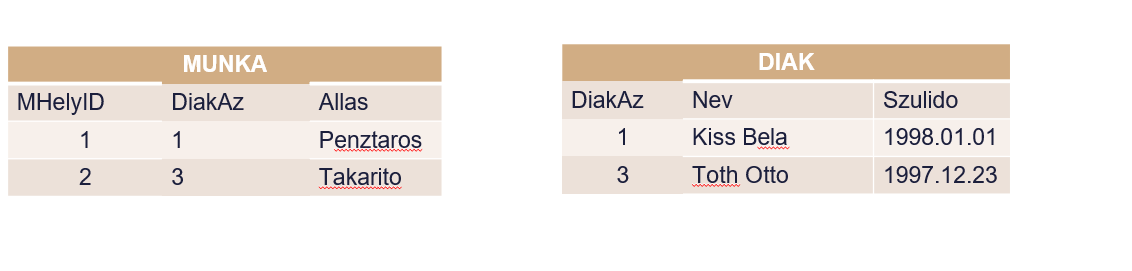

Feladat7 - Cassandra SQL lekérdezések vagy összetett adattípusok

Valósítsa meg a következő adatszerkezetet CQL-shell utasításokkal úgy, hogy egyetlen táblában legyen minden adat!

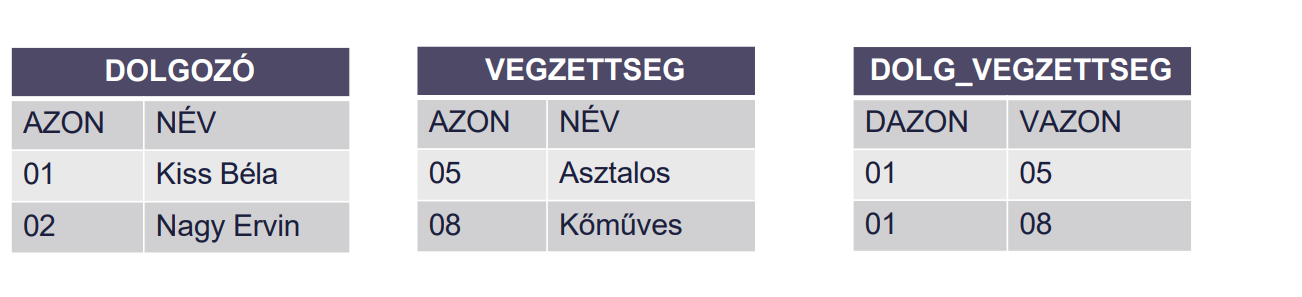

Feladat8 - MongoDB vagy Neo4J lekérdezés

Készítsünk lekérdezést a Neo4J Movies adatbázisából, amely megfelel a következő SQL lekérdezésnek:

<span style="white-space: pre; color: var(--vscode-foreground);">SELECT p.name AS DirectorName, </span> <span style="white-space: pre; color: var(--vscode-foreground);">COUNT(m.id) AS Quantity </span> <span style="white-space: pre; color: var(--vscode-foreground);">FROM Person p </span> <span style="white-space: pre; color: var(--vscode-foreground);">JOIN Directed d ON p.id = d.person_id </span> <span style="white-space: pre; color: var(--vscode-foreground);">JOIN Movie m ON d.movie_id = m.id </span> <span style="white-space: pre; color: var(--vscode-foreground);">WHERE p.name = 'Christopher Nolan' </span> <span style="white-space: pre; color: var(--vscode-foreground);">GROUP BY p.name </span> <span style="color: var(--vscode-foreground); white-space: pre;">ORDER BY Quantity DESC;</span><span style="color: var(--vscode-foreground); background-color: rgb(13, 13, 13); white-space: pre;">;</span>